<a href="https://colab.research.google.com/github/hasnanasa/AI-projects/blob/main/conditionalgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END


In [42]:
class AgentState(TypedDict):
  number1 : int
  operation : str
  number2 : int
  number3 :int
  number4: int


In [43]:
def adder1(state:AgentState) -> AgentState:
  state['router2'] = state["number1"] + state["number2"]
  return state
def substractor1(state:AgentState)->AgentState:
  state["router2"] = state["number1"] - state["number2"]
  return state

def adder2(state:AgentState)->AgentState:
  state['router3'] = state["number3"] + state["number4"]
  return state
def substractor2(state:AgentState)->AgentState:
  state["router3"] = state["number3"] - state["number4"]
  return state

In [44]:
def decide_next_node1(state:AgentState) -> AgentState:
  if state["operation"] == "+" :
     return "addition_operation1"
  elif state["operation"] == "-" :
       return "substraction_operation1"
def decide_next_node2(state:AgentState) -> AgentState:
  if state["operation"] == "+" :
     return "addition_operation2"
  elif state["operation"] == "-" :
       return "substraction_operation2"

In [45]:
# Create a single graph
graph = StateGraph(AgentState)

# Add all nodes (both trees)
# Tree 1 nodes
graph.add_node("tree1_router", lambda state: state)
graph.add_node("tree1_add", adder1)
graph.add_node("tree1_subtract", substractor1)

# Tree 2 nodes
graph.add_node("tree2_router", lambda state: state)
graph.add_node("tree2_add", adder2)
graph.add_node("tree2_subtract", substractor2)

# Connect Tree 1
graph.add_edge(START, "tree1_router")
graph.add_conditional_edges(
    "tree1_router",
    decide_next_node1,
    {
        "addition_operation1": "tree1_add",
        "substraction_operation1": "tree1_subtract"
    }
)

# Instead of going to END, Tree 1 nodes go to Tree 2's router
graph.add_edge("tree1_add", "tree2_router")
graph.add_edge("tree1_subtract", "tree2_router")

# Connect Tree 2
graph.add_conditional_edges(
    "tree2_router",
    decide_next_node2,
    {
        "addition_operation2": "tree2_add",
        "substraction_operation2": "tree2_subtract"
    }
)

# Tree 2 nodes go to END
graph.add_edge("tree2_add", END)
graph.add_edge("tree2_subtract", END)

app = graph.compile()

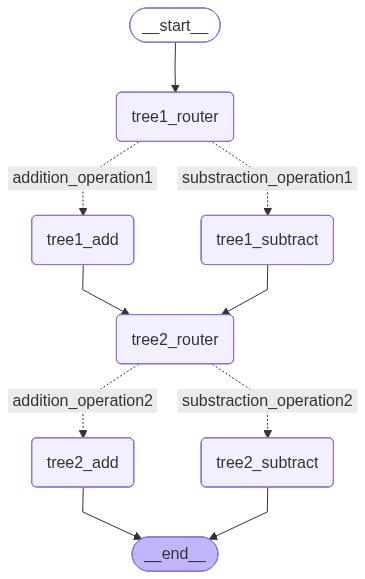

In [46]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


In [50]:
initial_state_2 = AgentState(number1= 13, operation= "+", number2= 4, number3=10, number4=20)
initial_state_3 = AgentState(number1= 5, operation = "-", number2 = 2, number3 = 4, number4 = 3)
print(app.invoke(initial_state_2))
print(app.invoke(initial_state_3))

{'number1': 13, 'operation': '+', 'number2': 4, 'number3': 10, 'number4': 20}
{'number1': 5, 'operation': '-', 'number2': 2, 'number3': 4, 'number4': 3}
